# SFH of SFR = 0 SIMBA galaxies

In [1]:
import os 
import sys 
import h5py 
import numpy as np 
# -- galpopfm --
from galpopfm import dust_infer as dustInfer
from galpopfm import measure_obs as measureObs

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
t_sfh_low, t_sfh_high = np.loadtxt('/Users/chahah/data/galpopfm/sed/simba/t_sfh.txt', unpack=True, delimiter=',', usecols=[0, 1])

In [4]:
sfh_simba = h5py.File('/Users/chahah/data/galpopfm/sed/simba/simba.sfh.m100n1024_s151_z0.00.hdf5', 'r')
sed_simba = dustInfer._read_sed('simba') 

In [5]:
sfr0_simba = sfh_simba['SFR'][...] == 0.
logsfr_simba = np.log10(sfh_simba['SFR'][...])
logsfr_simba[sfr0_simba] = -6

Text(0, 0.5, '$\\log {\\rm SSFR}$')

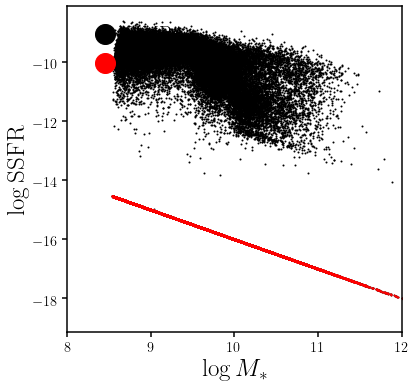

In [6]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_simba['logmstar'], logsfr_simba-sed_simba['logmstar'], c='k', s=1, label='SIMBA')
sub.scatter(sed_simba['logmstar'][sfr0_simba], logsfr_simba[sfr0_simba]-sed_simba['logmstar'][sfr0_simba], c='r', s=1, label='SFR=0')
sub.legend(loc='upper left', markerscale=20, handletextpad=0., fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SSFR}$', fontsize=25)

Lets compare the SFH of SFR =0 galaxies to quiescent galaxies with SFR > 0

In [7]:
sf = (sed_simba['logmstar'] > 10) & (logsfr_simba - sed_simba['logmstar'] > -10)
q = (sed_simba['logmstar'] > 10) & (logsfr_simba - sed_simba['logmstar'] < -11) & ~sfr0_simba
sfr0 = (sed_simba['logmstar'] > 10) & sfr0_simba

Text(0, 0.5, '$\\log {\\rm SSFR}$')

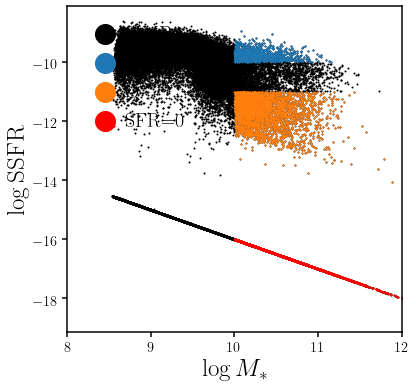

In [8]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_simba['logmstar'], logsfr_simba-sed_simba['logmstar'], c='k', s=1, label='SIMBA')
sub.scatter(sed_simba['logmstar'][sf], logsfr_simba[sf]-sed_simba['logmstar'][sf], c='C0', s=1, label='SF')
sub.scatter(sed_simba['logmstar'][q], logsfr_simba[q]-sed_simba['logmstar'][q], c='C1', s=1, label='Q')
sub.scatter(sed_simba['logmstar'][sfr0], logsfr_simba[sfr0]-sed_simba['logmstar'][sfr0], c='r', s=1, label='SFR=0')
sub.legend(loc='upper left', markerscale=20, handletextpad=0., fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SSFR}$', fontsize=25)

In [9]:
sfr_t_simba = np.sum(sfh_simba['StarMassFormed_in_metal_age_Bin'], axis=1) / (t_sfh_high - t_sfh_low) / 1e9

sfr_t_sf = np.quantile(sfr_t_simba[sf,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_q = np.quantile(sfr_t_simba[q,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_sfr0 = np.quantile(sfr_t_simba[sfr0,:], [0.16, 0.50, 0.84], axis=0)

Text(0, 0.5, 'SFR [$M_\\odot/yr$]')

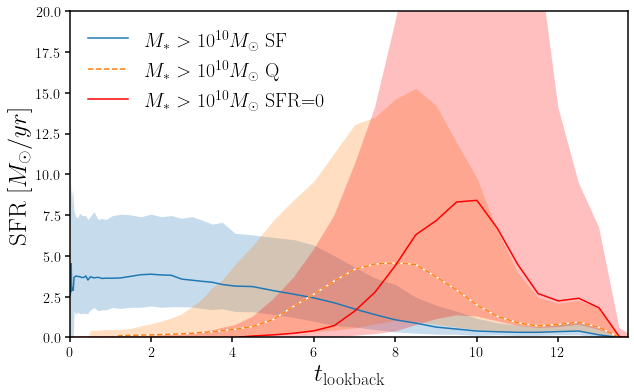

In [10]:
fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sf[0], sfr_t_sf[2], color='C0', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sf[1], c='C0', label='$M_* > 10^{10}M_\odot$ SF')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[0], sfr_t_q[2], color='C1', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[1], c='white', linestyle='-')
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[1], c='C1', linestyle='--', label='$M_* > 10^{10}M_\odot$ Q')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sfr0[0], sfr_t_sfr0[2], color='r', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sfr0[1], c='r', label='$M_* > 10^{10}M_\odot$ SFR=0')
sub.legend(loc='upper left', fontsize=20)
sub.set_xlim(0, 13.7)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)
sub.set_ylim(0., 20.)
sub.set_ylabel(r'SFR [$M_\odot/yr$]', fontsize=25)

## in $M_*$ bins 

Text(0, 0.5, 'SFR [$M_\\odot/yr$]')

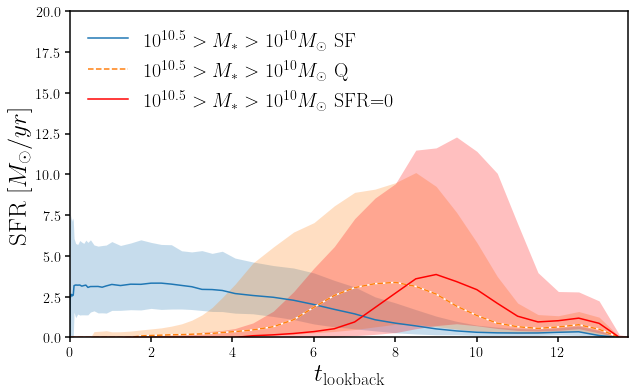

In [11]:
sf = (sed_simba['logmstar'] > 10) & (sed_simba['logmstar'] < 10.5) & (logsfr_simba - sed_simba['logmstar'] > -10)
q = (sed_simba['logmstar'] > 10) & (sed_simba['logmstar'] < 10.5) & (logsfr_simba - sed_simba['logmstar'] < -11) & ~sfr0_simba
sfr0 = (sed_simba['logmstar'] > 10) & (sed_simba['logmstar'] < 10.5) & sfr0_simba

sfr_t_sf = np.quantile(sfr_t_simba[sf,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_q = np.quantile(sfr_t_simba[q,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_sfr0 = np.quantile(sfr_t_simba[sfr0,:], [0.16, 0.50, 0.84], axis=0)

fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sf[0], sfr_t_sf[2], color='C0', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sf[1], c='C0', label='$10^{10.5} > M_* > 10^{10}M_\odot$ SF')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[0], sfr_t_q[2], color='C1', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[1], c='white', linestyle='-')
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[1], c='C1', linestyle='--', label='$10^{10.5} > M_* > 10^{10}M_\odot$ Q')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sfr0[0], sfr_t_sfr0[2], color='r', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sfr0[1], c='r', label='$10^{10.5} > M_* > 10^{10}M_\odot$ SFR=0')
sub.legend(loc='upper left', fontsize=20)
sub.set_xlim(0, 13.7)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)
sub.set_ylim(0., 20.)
sub.set_ylabel(r'SFR [$M_\odot/yr$]', fontsize=25)

Text(0, 0.5, 'SFR [$M_\\odot/yr$]')

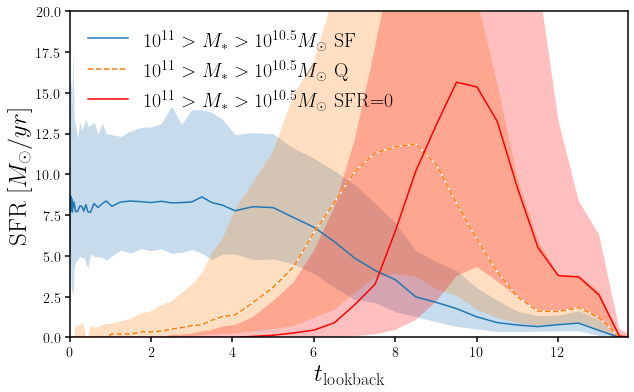

In [12]:
sf = (sed_simba['logmstar'] > 10.5) & (sed_simba['logmstar'] < 11.) & (logsfr_simba - sed_simba['logmstar'] > -10)
q = (sed_simba['logmstar'] > 10.5) & (sed_simba['logmstar'] < 11.) & (logsfr_simba - sed_simba['logmstar'] < -11) & ~sfr0_simba
sfr0 = (sed_simba['logmstar'] > 10.5) & (sed_simba['logmstar'] < 11.) & sfr0_simba

sfr_t_sf = np.quantile(sfr_t_simba[sf,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_q = np.quantile(sfr_t_simba[q,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_sfr0 = np.quantile(sfr_t_simba[sfr0,:], [0.16, 0.50, 0.84], axis=0)

fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sf[0], sfr_t_sf[2], color='C0', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sf[1], c='C0', label='$10^{11} > M_* > 10^{10.5}M_\odot$ SF')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[0], sfr_t_q[2], color='C1', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[1], c='white', linestyle='-')
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[1], c='C1', linestyle='--', label='$10^{11} > M_* > 10^{10.5}M_\odot$ Q')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sfr0[0], sfr_t_sfr0[2], color='r', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sfr0[1], c='r', label='$10^{11} > M_* > 10^{10.5}M_\odot$ SFR=0')
sub.legend(loc='upper left', fontsize=20)
sub.set_xlim(0, 13.7)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)
sub.set_ylim(0., 20.)
sub.set_ylabel(r'SFR [$M_\odot/yr$]', fontsize=25)

Text(0, 0.5, 'SFR [$M_\\odot/yr$]')

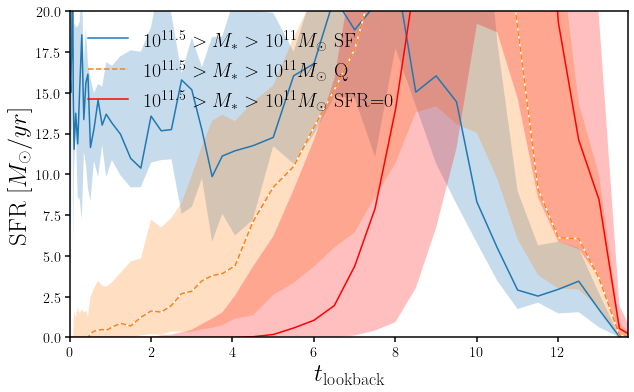

In [13]:
sf = (sed_simba['logmstar'] > 11.) & (sed_simba['logmstar'] < 11.5) & (logsfr_simba - sed_simba['logmstar'] > -10)
q = (sed_simba['logmstar'] > 11.) & (sed_simba['logmstar'] < 11.5) & (logsfr_simba - sed_simba['logmstar'] < -11) & ~sfr0_simba
sfr0 = (sed_simba['logmstar'] > 11.) & (sed_simba['logmstar'] < 11.5) & sfr0_simba

sfr_t_sf = np.quantile(sfr_t_simba[sf,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_q = np.quantile(sfr_t_simba[q,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_sfr0 = np.quantile(sfr_t_simba[sfr0,:], [0.16, 0.50, 0.84], axis=0)

fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sf[0], sfr_t_sf[2], color='C0', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sf[1], c='C0', label='$10^{11.5} > M_* > 10^{11}M_\odot$ SF')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[0], sfr_t_q[2], color='C1', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[1], c='white', linestyle='-')
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_q[1], c='C1', linestyle='--', label='$10^{11.5} > M_* > 10^{11}M_\odot$ Q')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sfr0[0], sfr_t_sfr0[2], color='r', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_sfr0[1], c='r', label='$10^{11.5} > M_* > 10^{11}M_\odot$ SFR=0')
sub.legend(loc='upper left', fontsize=20)
sub.set_xlim(0, 13.7)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)
sub.set_ylim(0., 20.)
sub.set_ylabel(r'SFR [$M_\odot/yr$]', fontsize=25)